# Hypothesis Testing Project

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [157]:
# Packages used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pingouin as pg

In [159]:
# EDA about the csv's
f_df = pd.read_csv('women_results.csv')
m_df = pd.read_csv('men_results.csv')

f_df.describe()
f_df.info()
m_df.describe()
m_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4884 non-null   int64 
 1   date        4884 non-null   object
 2   home_team   4884 non-null   object
 3   away_team   4884 non-null   object
 4   home_score  4884 non-null   int64 
 5   away_score  4884 non-null   int64 
 6   tournament  4884 non-null   object
dtypes: int64(3), object(4)
memory usage: 267.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44353 entries, 0 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44353 non-null  int64 
 1   date        44353 non-null  object
 2   home_team   44353 non-null  object
 3   away_team   44353 non-null  object
 4   home_score  44353 non-null  int64 
 5   away_score  44353 non-null  int64 
 6   tournament  44353 non-null  object
dtypes: int64(

In [160]:
# Proportions about tournaments
prop = f_df['tournament'].value_counts(normalize=True)
print(prop)

UEFA Euro qualification                 0.295864
Algarve Cup                             0.112817
FIFA World Cup                          0.058149
AFC Championship                        0.054873
Cyprus Cup                              0.052826
African Championship qualification      0.046274
UEFA Euro                               0.037674
African Championship                    0.035422
FIFA World Cup qualification            0.035217
CONCACAF Gold Cup qualification         0.029279
AFC Asian Cup qualification             0.028870
Copa América                            0.026822
Olympic Games                           0.026618
CONCACAF Gold Cup                       0.025799
Friendly                                0.022727
AFC Asian Cup                           0.022727
Four Nations Tournament                 0.021704
OFC Championship                        0.015971
African Cup of Nations qualification    0.011876
CONCACAF Championship                   0.008600
SheBelieves Cup     

In [161]:
# Sum all the scores: home_score and away_score
f_df['all_goals'] = f_df['home_score'] + f_df['away_score']
m_df['all_goals'] = m_df['home_score'] + m_df['away_score']

f_df.head(3000)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,all_goals
0,0,1969-11-01,Italy,France,1,0,Euro,1
1,1,1969-11-01,Denmark,England,4,3,Euro,7
2,2,1969-11-02,England,France,2,0,Euro,2
3,3,1969-11-02,Italy,Denmark,3,1,Euro,4
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship,5
...,...,...,...,...,...,...,...,...
2995,2995,2012-07-25,Colombia,North Korea,0,2,Olympic Games,2
2996,2996,2012-07-28,New Zealand,Brazil,0,1,Olympic Games,1
2997,2997,2012-07-28,Great Britain,Cameroon,3,0,Olympic Games,3
2998,2998,2012-07-28,Japan,Sweden,0,0,Olympic Games,0


In [162]:
# Getting date over 2002-01-01

pd.to_datetime(f_df['date'])
pd.to_datetime(m_df['date'])

f_date = f_df[f_df['date'] > '2002-01-01']
m_date = m_df[m_df['date'] > '2002-01-01']

# Getting only the FIFA World Cup tournament all goals

# Femenine
f_World_Cup = f_date[f_date['tournament'] == 'FIFA World Cup']
f_World_Cup_all_goals = f_World_Cup[['all_goals']]

# Masculine
m_World_Cup = m_date[m_date['tournament'] == 'FIFA World Cup']
m_World_Cup_all_goals = m_World_Cup[['all_goals']]



print(f_World_Cup_all_goals.describe())
print(m_World_Cup_all_goals.describe())

        all_goals
count  200.000000
mean     2.980000
std      2.022387
min      0.000000
25%      2.000000
50%      3.000000
75%      4.000000
max     13.000000
        all_goals
count  384.000000
mean     2.513021
std      1.652544
min      0.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      8.000000


array([[<AxesSubplot: title={'center': 'all_goals'}>]], dtype=object)

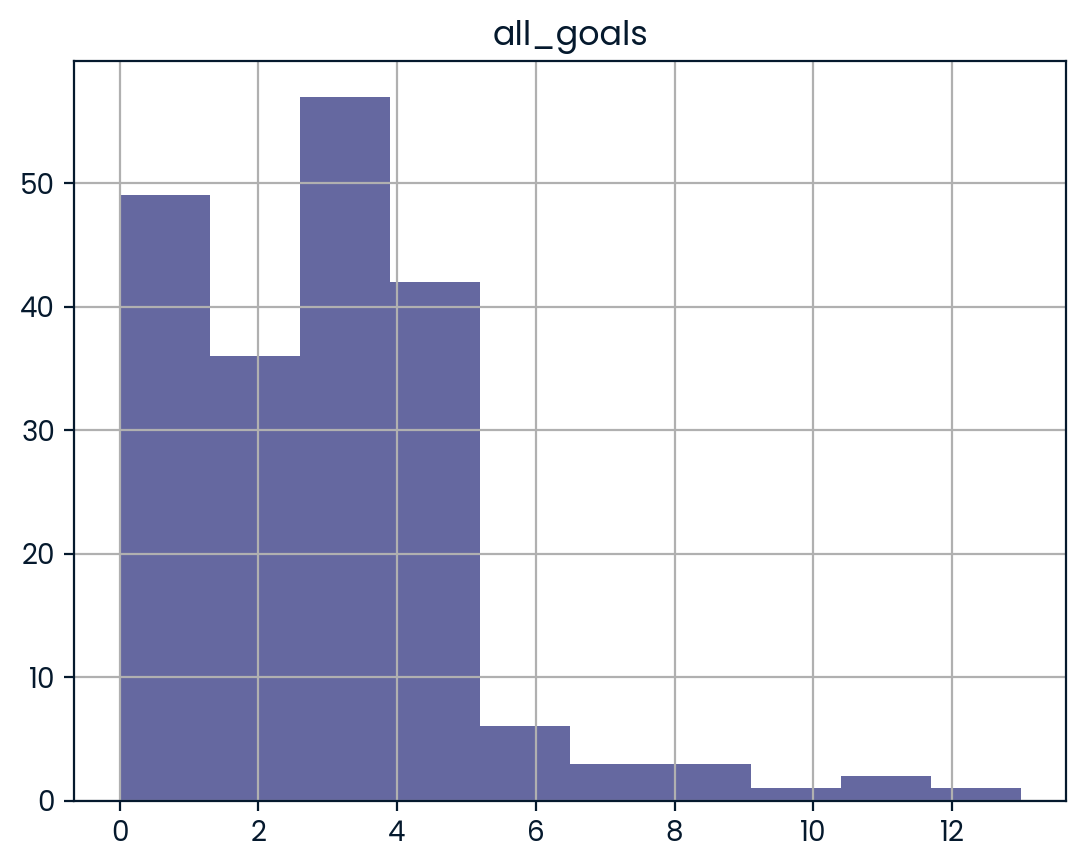

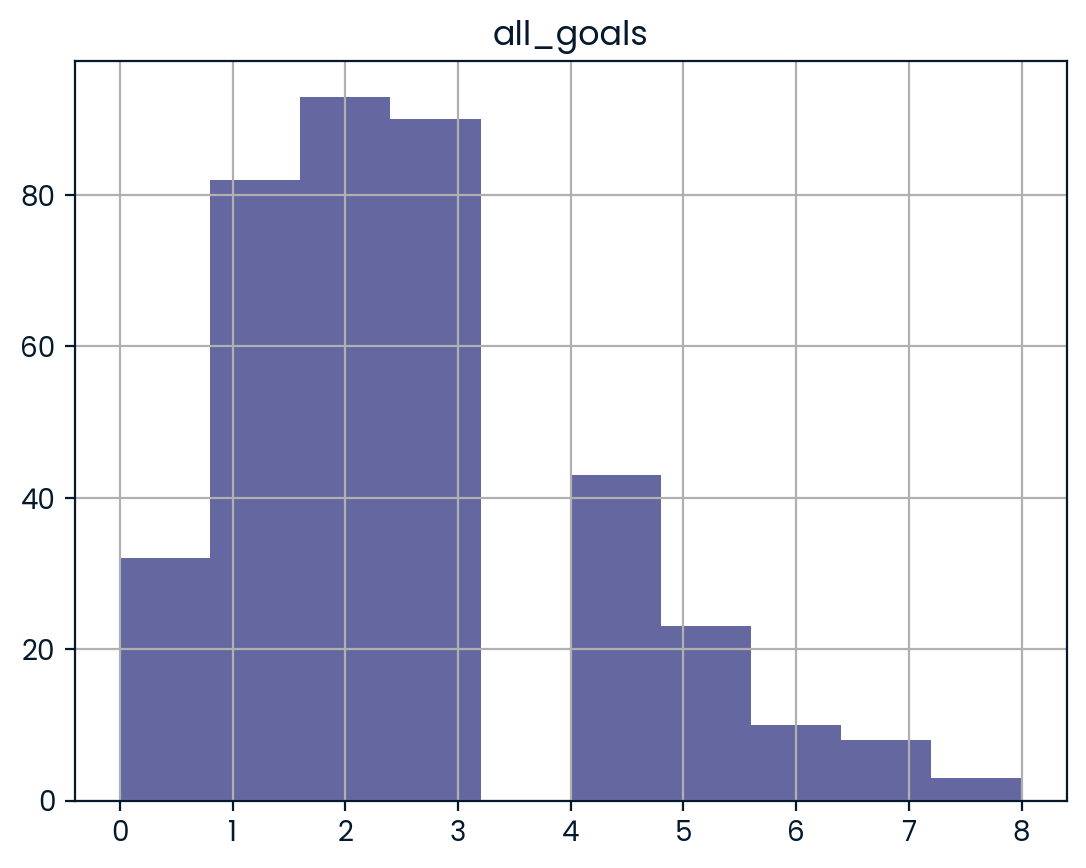

In [163]:
# Hypothesis Testing: Unpaired test, checking the distribution

f_World_Cup_all_goals.hist()
m_World_Cup_all_goals.hist()


In [164]:
# Unpaired Wilcoxon-Mann-Whitney test non-parametric using pingouin

test = pg.mwu(x = f_World_Cup_all_goals, y = m_World_Cup_all_goals, alternative = 'greater')

print(test)

p_array = np.array(test['p-val'])

print(p_array)

p_val = p_array.astype(float)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451
[0.00510661]


In [165]:
# Results

significance = 0.10

check = p_val < significance

print(check)

result = 'reject'

result_dict = {
    'p_val': p_val, 'result' : result
}

[ True]
